基于data.csv数据，建立mlp模型，计算其在测试数据上的准确率，可视化模型预测结果:
1.进行数据分离: test size=0,33,random_state=10
2.模型结构:一层隐藏层，有20个神经元

In [18]:
# 建立一个Sequential顺序模型
from tensorflow.keras.models import Sequential
from keras.models import Sequential
model = Sequential()

In [20]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('mlp_data.csv')
data.head()

,x1,x2,y
0,0.0323,0.0244,1
1,0.0887,0.0244,1
2,0.1690,0.0163,1
3,0.2420,0.0000,1
4,0.2420,0.0488,1


In [21]:
# define the X and y
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']
X.head()

,x1,x2
0,0.0323,0.0244
1,0.0887,0.0244
2,0.1690,0.0163
3,0.2420,0.0000
4,0.2420,0.0488


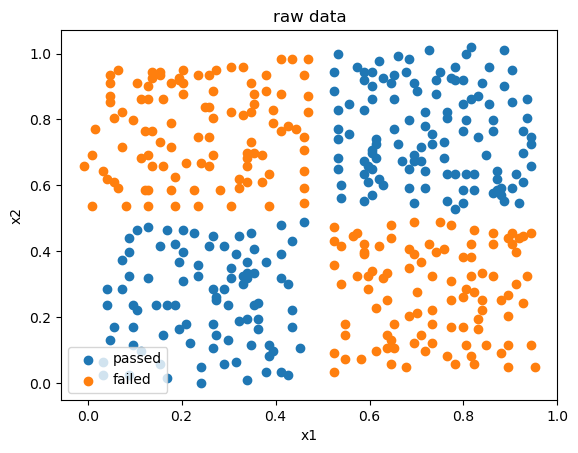

In [25]:
# visualize the data
from matplotlib import pyplot as plt

fig1 = plt.figure()
passed = plt.scatter(X.loc[y==1, 'x1'], X.loc[y==1, 'x2'])
failed = plt.scatter(X.loc[y==0, 'x1'], X.loc[y==0, 'x2'])
plt.legend(['passed', 'failed'])
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [27]:
# split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)
print(X_train.shape,X_test.shape,X.shape)

(275, 2) (136, 2) (411, 2)


In [31]:
# set up the model
from keras.models import Sequential
from keras.layers import Dense,Activation

mlp = Sequential()
mlp.add(Dense(units=20,activation='sigmoid',input_dim=2))
mlp.add(Dense(units=1,activation='sigmoid'))
model_summary = mlp.summary()
print(model_summary)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                60        
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [33]:
# compile the model
mlp.compile(optimizer='adam',loss='binary_crossentropy')

In [34]:
# train the model
mlp.fit(X_train,y_train,epochs=3000)

Epoch 1/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.7773
Epoch 2/3000
9/9 [==============================] - 0s 976us/step - loss: 0.7551
Epoch 3/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.7399
Epoch 4/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.7254
Epoch 5/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.7153
Epoch 6/3000
9/9 [==============================] - 0s 958us/step - loss: 0.7089
Epoch 7/3000
9/9 [==============================] - 0s 4ms/step - loss: 0.7021
Epoch 8/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6999
Epoch 9/3000
9/9 [==============================] - 0s 907us/step - loss: 0.6972
Epoch 10/3000
9/9 [==============================] - 0s 964us/step - loss: 0.6959
Epoch 11/3000
9/9 [==============================] - 0s 896us/step - loss: 0.6950
Epoch 12/3000
9/9 [==============================] - 0s 816us/step - loss: 0.6948
Epoch 13/3000
9/9 [==================

In [51]:
# make prediction and calculate the accuracy
y_train_predict = np.round(mlp.predict(X_train)).astype(int)
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

9/9 [==============================] - 0s 748us/step
0.8872727272727273


In [52]:
# make prediction based on the test data
y_test_predict =  np.round(mlp.predict(X_test)).astype(int)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

5/5 [==============================] - 0s 997us/step
0.8823529411764706


In [55]:
print(y_train_predict)
y_train_predict_form = pd.Series([i[0] for i in y_test_predict])
print(y_train_predict_form)

[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]


In [65]:
# generate new data for plot
xx, yy = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
x_range = np.c_[xx.ravel(),yy.ravel()]
y_range_predict =  np.round(mlp.predict(x_range)).astype(int)
print(type(y_test_predict))

313/313 [==============================] - 0s 598us/step
<class 'numpy.ndarray'>


In [67]:
# format the output
y_range_predict_form = pd.Series(i[0] for i in y_range_predict)
print(y_range_predict_form)

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Length: 10000, dtype: int32


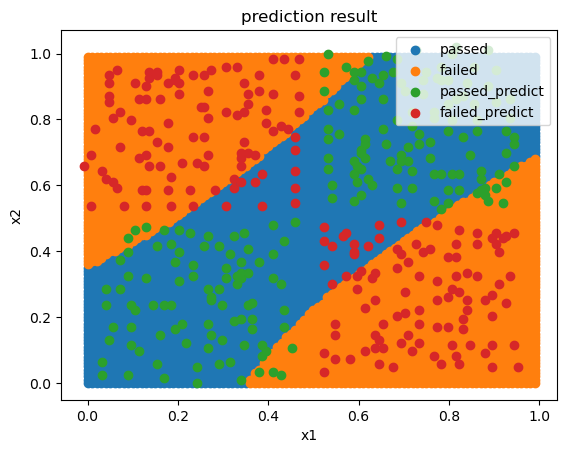

In [68]:
fig2 = plt.figure()
passed_predict = plt.scatter(x_range[y_range_predict_form==1,0], x_range[y_range_predict_form==1, 1])
failed_predict = plt.scatter(x_range[y_range_predict_form==0,0], x_range[y_range_predict_form==0, 1])

passed = plt.scatter(X.loc[y==1, 'x1'], X.loc[y==1, 'x2'])
failed = plt.scatter(X.loc[y==0, 'x1'], X.loc[y==0, 'x2'])

plt.legend(['passed', 'failed', 'passed_predict', 'failed_predict'])
plt.title('prediction result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

好坏质检二分类mlp实战summary:
1、通过mlp模型，在不增加特征项的情况下，实现了非线性二分类任务:
2、掌握了mlp模型的建立、配置与训练方法，并实现基于新数据的预测;
3、熟悉了mlp分类的预测数据格式，并实现格式转换:
4、核心算法参考链接: https://keras-cn.readthedocs.io/en/latest/#30skeras